## Observations and Insights 

In [515]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data=pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
mouse_data.head(50)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [38]:
# Checking the number of mice.
mouse_data['Mouse ID'].nunique()

249

In [378]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = mouse_data.groupby('Mouse ID')[['Mouse ID', 'Timepoint']].nunique()
dup_mice.head()

,Mouse ID,Timepoint
Mouse ID,,
a203,1,10
a251,1,10
a262,1,10
a275,1,10
a366,1,7


In [29]:
# Optional: Get all the data for the duplicate mouse ID. 

dup_mouse=pd.concat(g for _, g in mouse_data.groupby(["Mouse ID", "Timepoint"]) if len(g) > 1)
dup_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [346]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_test = mouse_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False).reset_index(drop=True)

clean_data = clean_data[clean_data['Mouse ID']!='g989'].reset_index(drop=True)

In [347]:
# Checking the number of mice in the clean DataFrame.
clean_data['Mouse ID'].nunique()

248

## Summary Statistics

In [348]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summ_table = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)']
desc_summ_table = summ_table.describe()
summ_table_mean = summ_table.mean()
summ_table_median = summ_table.median()
summ_table_var = summ_table.var()
summ_table_std = summ_table.std()
summ_table_sem = summ_table.sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
final_summ_table = pd.merge(pd.merge(pd.merge(pd.merge(summ_table_mean, summ_table_median, on='Drug Regimen'), 
                    summ_table_var, on='Drug Regimen'), summ_table_std, on='Drug Regimen'), 
                            summ_table_sem, on='Drug Regimen')
ind = [1,2,3,4,5]
final_summ_table.columns=[['Mean of Tumor Volume (mm3)', 'Median of Tumor Volume (mm3)', 
                          'Variance of Tumor Volume (mm3)', 
                        'Standard Deviation of Tumor Volume (mm3)', 
                        'Standard Error of Tumor Volume (mm3)']]
final_summ_table


,Mean of Tumor Volume (mm3),Median of Tumor Volume (mm3),Variance of Tumor Volume (mm3),Standard Deviation of Tumor Volume (mm3),Standard Error of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [349]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
final_summ_table_1 = final_summ_table.describe()
# Using the aggregation method, produce the same summary statistics in a single line
agg_data=clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_data

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Mice Tested on each Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

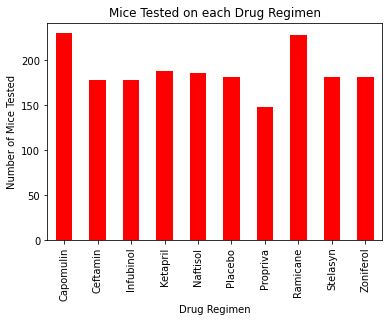

In [350]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_1 = clean_data.groupby(['Drug Regimen']).count()
mice_bar = drug_1['Mouse ID']
mice_bar.plot(kind='bar', ylabel='Number of Mice Tested', title='Mice Tested on each Drug Regimen',facecolor='red')



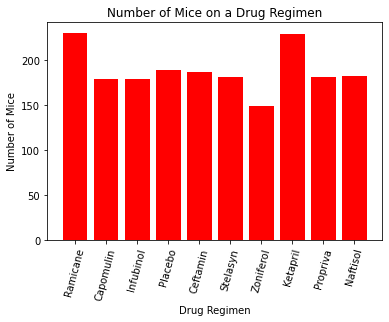

In [351]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drugs=pd.Series(clean_data['Drug Regimen'].unique())
x=np.arange(len(drugs))
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Number of Mice on a Drug Regimen')
plt.bar(x, mice_bar, align='center', facecolor='red')
drug_locations=[]
for i in x:
    drug_locations.append(i)
plt.xticks(drug_locations, drugs, rotation=75)
plt.show()

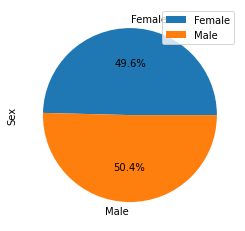

In [372]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
uniq_mice= clean_data.drop_duplicates(['Mouse ID'], keep='last').reset_index(drop=True)
fem_mice = (uniq_mice.loc[uniq_mice['Sex']=='Female'].reset_index(drop=True))['Mouse ID'].count()
male_mice = (uniq_mice.loc[uniq_mice['Sex']=='Male'].reset_index(drop=True))['Mouse ID'].count()
labels = ['Female', 'Male']
sizes = [fem_mice, male_mice]
colors = ['red', 'blue']
total_gen_mice = fem_mice + male_mice
uniq_mice.groupby(['Sex']).count().plot(kind='pie', y='Mouse ID', autopct="%1.1f%%", ylabel='Sex')
plt.show()

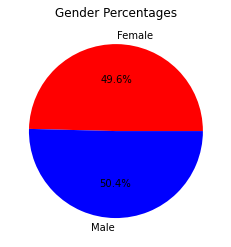

123

In [370]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title('Gender Percentages')
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")
plt.show()
fem_mice

## Quartiles, Outliers and Boxplots

In [420]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_tumor = uniq_mice.loc[uniq_mice['Drug Regimen']=='Capomulin']
ramicane_tumor = uniq_mice.loc[uniq_mice['Drug Regimen']=='Ramicane']
infubinol_tumor = uniq_mice.loc[uniq_mice['Drug Regimen']=='Infubinol']
ceftamin_tumor = uniq_mice.loc[uniq_mice['Drug Regimen']=='Ceftamin']
all_4 = uniq_mice.loc[(uniq_mice['Drug Regimen']=='Ceftamin')|(uniq_mice['Drug Regimen']=='Capomulin')
                     |(uniq_mice['Drug Regimen']=='Ramicane')|(uniq_mice['Drug Regimen']=='Infubinol'), 
                     ['Mouse ID','Tumor Volume (mm3)']]
# Start by getting the last (greatest) timepoint for each mouse
clean_data_2= pd.merge(clean_data, all_4, on='Mouse ID', how='left')
clean_data_2.rename(columns={'Tumor Volume (mm3)_x': 'Tumor Volume (mm3)', 
                    'Tumor Volume (mm3)_y': 'Tumor Volume at the Last Timepoint'}, inplace=True)
clean_data_w4 = clean_data_2.loc[(clean_data_2['Drug Regimen']=='Ceftamin')|(clean_data_2['Drug Regimen']=='Capomulin')
                     |(clean_data_2['Drug Regimen']=='Ramicane')|(clean_data_2['Drug Regimen']=='Infubinol')]
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
clean_data_w4

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Tumor Volume at the Last Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,22.050126
1,k403,Ramicane,Male,21,16,5,38.825898,0,22.050126
2,k403,Ramicane,Male,21,16,10,35.014271,1,22.050126
3,k403,Ramicane,Male,21,16,15,34.223992,1,22.050126
4,k403,Ramicane,Male,21,16,20,32.997729,1,22.050126
...,...,...,...,...,...,...,...,...,...
1855,z581,Infubinol,Female,24,25,25,54.316407,2,62.754451
1856,z581,Infubinol,Female,24,25,30,56.286750,2,62.754451
1857,z581,Infubinol,Female,24,25,35,58.628399,3,62.754451
1858,z581,Infubinol,Female,24,25,40,60.053740,3,62.754451


In [497]:
# Put treatments into a list for for loop (and later for plot labels)
capomulin_tumor_out = uniq_mice.loc[uniq_mice['Drug Regimen']=='Capomulin', 'Tumor Volume (mm3)']
ramicane_tumor_out = uniq_mice.loc[uniq_mice['Drug Regimen']=='Ramicane', 'Tumor Volume (mm3)']
infubinol_tumor_out = uniq_mice.loc[uniq_mice['Drug Regimen']=='Infubinol', 'Tumor Volume (mm3)']
ceftamin_tumor_out = uniq_mice.loc[uniq_mice['Drug Regimen']=='Ceftamin', 'Tumor Volume (mm3)']
all_4_list = list(all_4['Tumor Volume (mm3)'])

# Calculate the IQR and quantitatively determine if there are any potential outliers.

    # Locate the rows which contain mice on each drug and get the tumor volumes
quartiles_1 = capomulin_tumor_try.quantile([.25,.5,.75])
lowerq_1 = quartiles_1[0.25]
upperq_1 = quartiles_1[0.75]
iqr_1 = upperq_1-lowerq_1 
lower_bound_1 = lowerq_1 - (1.5*iqr_1)
upper_bound_1 = upperq_1 + (1.5*iqr_1)

quartiles_2 = ramicane_tumor_out.quantile([.25,.5,.75])
lowerq_2 = quartiles_2[0.25]
upperq_2 = quartiles_2[0.75]
iqr_2 = upperq_2-lowerq_2
lower_bound_2 = lowerq_2 - (1.5*iqr_2)
upper_bound_2 = upperq_2 + (1.5*iqr_2)

quartiles_3 = infubinol_tumor_out.quantile([.25,.5,.75])
lowerq_3 = quartiles_3[0.25]
upperq_3 = quartiles_3[0.75]
iqr_3 = upperq_3-lowerq_3
lower_bound_3 = lowerq_3 - (1.5*iqr_3)
upper_bound_3 = upperq_3 + (1.5*iqr_3)

quartiles_4 = ceftamin_tumor_out.quantile([.25,.5,.75])
lowerq_4 = quartiles_4[0.25]
upperq_4 = quartiles_4[0.75]
iqr_4 = upperq_4-lowerq_4
lower_bound_4 = lowerq_4 - (1.5*iqr_4)
upper_bound_4 = upperq_4 + (1.5*iqr_4)

capomulin_out = []
ramicane_out = []
infubinol_out = []
ceftamin_out = []

for i in capomulin_tumor_out:
    if (i<lower_bound_1) | (i>upper_bound_1):
        capomulin_out.append(i)

for i in ramicane_tumor_out:
    if (i<lower_bound_2) | (i>upper_bound_2):
        ramicane_out.append(i)
        
for i in infubinol_tumor_out:
    if (i<lower_bound_3) | (i>upper_bound_3):
        infubinol_out.append(i)
        
for i in ceftamin_tumor_out:
    if (i<lower_bound_4) | (i>upper_bound_4):
        ceftamin_out.append(i)

print(f"Capomulin's potential outliers: {capomulin_out}")
print(f"Ramicane's potential outliers: {ramicane_out}")
print(f"Infubinol's potential outliers: {infubinol_out}")
print(f"Ceftamin's potential outliers: {ceftamin_out}")
    # add subset 
    
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []
[36.3213458]
36.83290494999999
82.74144559000001


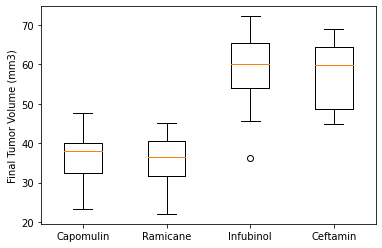

In [489]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
capomulin_tumor_list = list(uniq_mice.loc[uniq_mice['Drug Regimen']=='Capomulin', 'Tumor Volume (mm3)'])
ramicane_tumor_list = list(uniq_mice.loc[uniq_mice['Drug Regimen']=='Ramicane', 'Tumor Volume (mm3)'])
infubinol_tumor_list = list(uniq_mice.loc[uniq_mice['Drug Regimen']=='Infubinol', 'Tumor Volume (mm3)'])
ceftamin_tumor_list = list(uniq_mice.loc[uniq_mice['Drug Regimen']=='Ceftamin', 'Tumor Volume (mm3)'])
all_4_list = list(all_4['Tumor Volume (mm3)'])
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
x_labeling = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
x_trying = [1,2,3,4]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
data_4=[capomulin_tumor_list, ramicane_tumor_list, infubinol_tumor_list, ceftamin_tumor_list]
for i in x_trying:
    tumor_vol_data.append(i)

fig1, ax1 = plt.subplots()
ax1.boxplot(data_4)
plt.xticks(tumor_vol_data, x_labeling)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

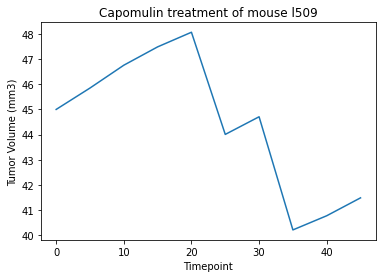

In [502]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_l509 = clean_data.loc[clean_data['Mouse ID']=='l509']
plt.plot(mouse_l509['Timepoint'], mouse_l509['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

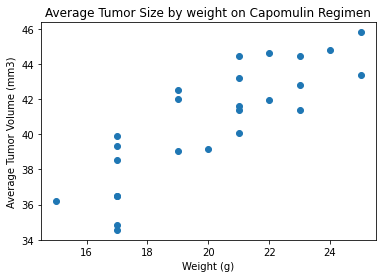

In [512]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
ave_weight = clean_data.loc[clean_data['Drug Regimen']=='Capomulin']
to_scatter = ave_weight.groupby('Mouse ID').mean()
plt.scatter(to_scatter['Weight (g)'], to_scatter['Tumor Volume (mm3)'])
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.title('Average Tumor Size by weight on Capomulin Regimen')
plt.show()

## Correlation and Regression

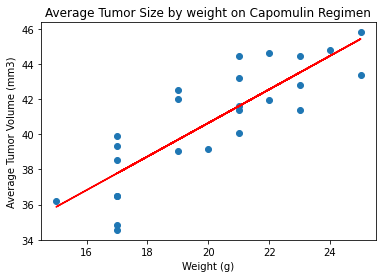

The correlation between mouse weight and the average tumor volume is 0.84


In [518]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(to_scatter['Weight (g)'], to_scatter['Tumor Volume (mm3)'])
regress_values = to_scatter['Weight (g)'] * slope + intercept
plt.scatter(to_scatter['Weight (g)'], to_scatter['Tumor Volume (mm3)'])
plt.plot(to_scatter['Weight (g)'],regress_values,"r-")
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.title('Average Tumor Size by weight on Capomulin Regimen')
plt.show()
print(f'The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}')